### NLP Sentiment Analysis Exercise

In [1]:
# import numpy 
import numpy as np 

# import pandas
import pandas as pd 

# import regex
import re

# import nltk
import nltk 

In [3]:
# load data
# data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv('../Tweets.csv')

**Task:** Print the top 5 rows.

In [5]:
print(airline_tweets.shape)
airline_tweets.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Task:** Use the `'text'` column to create an array with the name `'features'`.



In [9]:
features = airline_tweets['text'].to_numpy()
print(type(features))
print(features.shape)

<class 'numpy.ndarray'>
(14640,)


**Task:** Use `'airline_sentiment'` column to create an array with the name `'labels'`.

In [11]:
labels = airline_tweets['airline_sentiment'].to_numpy()

**Task:** Clean the text data in the `'features'` array.

    - Remove all the special characters.
    - Remove all single characters.
    - Remove single characters from the start.
    - Substituting multiple spaces with single space.
    - Converting all text to lowercase.

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
import string
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize

# Define a function
def preprocess(docs):
    """`
    Process documents:
    - Remove all the special characters
    - Remove all single characters
    - Substitute multiple spaces with single space
    - Convert to Lowercase
    """
    clean_docs = []
    for doc in docs:
        # Split text into single words (also gets rid of extra white spaces)
        words = word_tokenize(doc)
        # Convert to lower case
        words = [word.lower() for word in words]

        # Remove all single characters
        words = [word for word in words if len(word) > 2]
        
        # join words back together as a string
        words = ''.join([word+' ' for word in words])

        # remove special characters
        processed = ''.join([char for char in words if not char in string.punctuation])
        
        clean_docs.append(processed)
    return np.array(clean_docs)

processor = FunctionTransformer(preprocess)
processor.fit_transform(features[0:3])

array(['virginamerica what dhepburn said ',
       'virginamerica plus you ve added commercials the experience  tacky ',
       'virginamerica did nt today  must mean need take another trip '],
      dtype='<U66')

In [65]:
features[0:3]

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!"],
      dtype=object)

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    

    # Remove all single characters
    

    # Remove single characters from the start
    

    # Substituting multiple spaces with single space
    

    # Converting to Lowercase
    

**Task:** Import stopwords from nltk.

**Task:** Import TfidfVectorizer from sklearn.

**Task:** Instatiate TfidfVectorizer with following parameters:

    - max_features = 2500
    - min_df = 7
    - max_df = 0.8
    - stop_words = stopwords.words('english')
    
    


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(max_features=2500,min_df=7, 
    max_df=0.8, stop_words=stopwords.words('english'))

In [59]:
vectorizer.fit_transform(features).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Bonus:** How would you determine optimal paraemeters for TfidfVectorizer? Discuss with your peers and/or mentors. Write down your answer below.

**Task:** Transform features with vectorizer. 

In [74]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('preprocess', processor),
    ('vectorize', vectorizer)
])
pipe.fit(features)
vectors = pipe.transform(features).toarray()
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Task:** Import train_test_split from sklearn and split the data.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, train_size=0.8,random_state=0)

In [73]:
print(X_train.shape)
print(X_train)

(11712, 2196)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Task:** Import any classifier of your choice from sklearn (e.g. Random Forest, LogReg, Naive Bayes).

## Naïve Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

**Task:** Fit your classifier to data.

In [ ]:
# Including GaussianNB in pipeline won't work unless given a dense matrix
pipe_nb = Pipeline([
    ('process', pipe),
    ('naive_bayes', classifier)
])
pipe_nb.fit(features[0:100], labels[0:100])
y_pred_train = pipe_nb.predict(features[101])

**Task:** Predict X_test.

In [78]:
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

**Task:** Import confusion matrix and accuracy_score.

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_classifier(classifier, X_test, y_test, X_train, y_train, pos_label='1',model_name='classifier'):
    """
    Print evaluation metrics of the classifier. Classifier should be fit prior to calling this function.
        * recall
        * precision
        * F1
        * AUC score (only if class labels are integers)
    Plot:
        * confusion matrix
        * ROC (only if class labels are integers)
    Parameters:
    - pos_label (str or int): Class label for positive class. Default is 1.
    - model_name (string, optional): Name of model printing purposes.

    Returns evaluation metrics for test data set as a dictionary
    """
    
    best_model = classifier

    y_pred = best_model.predict(X_test)

    y_pred_train = best_model.predict(X_train)

    # Metrics for test data
    metrics = dict()
    if len(set(y_test)) == 2:
        recall = recall_score(y_test, y_pred, pos_label=pos_label)
        precision = precision_score(y_test, y_pred, pos_label=pos_label)
        f1score = f1_score(y_test, y_pred, pos_label=pos_label)
        metrics['recall'] = recall,
        metrics['precision'] = precision
        metrics['f1'] = f1score

    accuracy = accuracy_score(y_test, y_pred)
    metrics['accuracy'] = accuracy

    # Metrics for training data
    if len(set(y_test)) == 2:
        recall_train = recall_score(y_train, y_pred_train, pos_label=pos_label)
        precision_train = precision_score(y_train, y_pred_train, pos_label=pos_label)
        f1score_train = f1_score(y_train, y_pred_train, pos_label=pos_label)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    print(f'\n{model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
    print(f'Accuracy: \t{100*accuracy:.2f}%\t\t{100*accuracy_train:.2f}%\t\t{100*(accuracy-accuracy_train):.2f}%')
    if len(set(y_test)) == 2:
        print(f'Recall: \t{100*recall:.2f}%\t\t{100*recall_train:.2f}%\t\t{100*(recall-recall_train):.2f}%')
        print(f'Precision: \t{100*precision:.2f}%\t\t{100*precision_train:.2f}%\t\t{100*(precision-precision_train):.2f}%')
        print(f'F1: \t\t{100*f1score:.2f}%\t\t{100*f1score_train:.2f}%\t\t{100*(f1score-f1score_train):.2f}%')
        if type(y_test) == 'int':
            auc = roc_auc_score(y_test, y_pred)
            auc_train = roc_auc_score(y_train, y_pred_train)
            print(f'AUC: \t\t{100*auc:.2f}%\t\t{100*auc_train:.2f}%\t\t{100*(auc-auc_train):.2f}%')
            RocCurveDisplay.from_estimator(best_model, X_train, y_train)
            metrics['auc'] = auc
    
    ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train)
    return metrics

**Task:** Print confusion matrix.

**Task:** Print accaccuracy_score.


Naive Bayes classifier evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	41.02%		47.04%		-6.02%


{'accuracy': 0.4101775956284153}

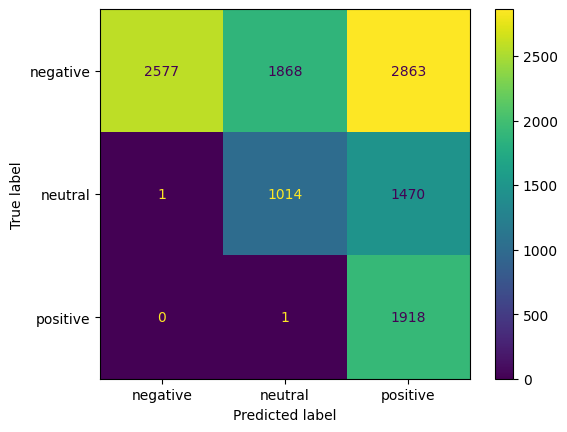

In [92]:
evaluate_classifier(classifier, X_test, y_test, X_train, y_train, pos_label='positive',model_name='Naive Bayes classifier')

## Logistic Regression


Logistic Regression evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	79.13%		84.70%		-5.57%


{'accuracy': 0.7913251366120219}

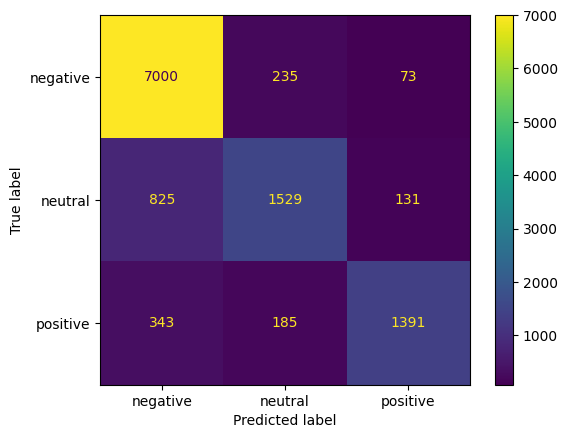

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, y_train)
evaluate_classifier(lr, X_test, y_test, X_train, y_train, pos_label='positive',model_name='Logistic Regression')

## Multinomial Naïve Bayes


Multinomial Naïve Bayes evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	75.07%		78.33%		-3.26%


{'accuracy': 0.7506830601092896}

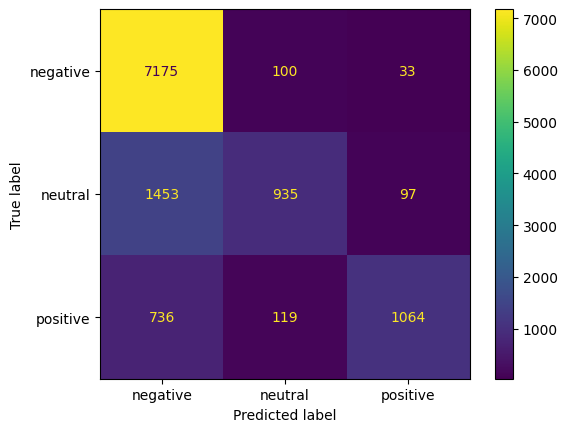

In [97]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
evaluate_classifier(mnb, X_test, y_test, X_train, y_train, model_name='Multinomial Naïve Bayes')